In [2]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [3]:
def plot_pairs(pairs, data, period_ext=None):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [4]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [5]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-11
data: (319, 72)
pairs: (2203, 11)


In [6]:
#data.to_excel('datasets/data_cart.xlsx')

In [7]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,PeriodQt,PeriodStr
0,100,ABEV3,AZUL4,-4.106537,99,0.169632,2.751306,3,0.442744,3,"100,120,140"
1,100,ABEV3,B3SA3,-3.456112,95,0.122632,1.883905,3,0.400432,2,"100,120"
2,100,ABEV3,BBAS3,-4.549424,99,0.227999,2.277055,3,0.503552,8,"100,120,140,160,180,200,240,250"
3,100,ABEV3,BBDC3,-4.554400,99,0.340198,2.725376,3,0.498752,6,"100,120,140,160,180,200"
4,100,ABEV3,BBDC4,-4.729748,99,0.317526,2.745548,3,0.511257,6,"100,120,140,160,180,200"
...,...,...,...,...,...,...,...,...,...,...,...
2198,100,VALE3,VIVT4,-4.405357,99,-0.154065,0.595764,2,0.072823,3,"100,120,140"
2199,100,VALE3,VVAR3,-4.257448,99,0.074880,0.667313,2,0.122354,7,"100,120,140,200,220,240,250"
2200,100,VALE3,WEGE3,-4.835714,99,-0.154135,0.282099,2,0.026697,2,"100,120"
2201,100,VIVT4,VVAR3,-3.188820,95,0.423131,1.511109,3,0.312834,9,"100,120,140,160,180,200,220,240,250"


In [8]:
"""
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal"""

pairs_signal = pairs.loc[
    (pairs['Std'] >= 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,PeriodQt,PeriodStr
0,100,BTOW3,CVCB3,-4.246159,99,-0.434275,2.052060,2,0.105723,9,"100,120,140,160,180,200,220,240,250"
1,100,CCRO3,IGTA3,-4.148686,99,0.299903,2.019956,2,0.646334,9,"100,120,140,160,180,200,220,240,250"
2,100,CSNA3,SBSP3,-4.759957,99,0.087242,2.495762,2,0.409872,9,"100,120,140,160,180,200,220,240,250"
3,100,CSNA3,VVAR3,-4.867446,99,0.268027,2.483029,2,0.280012,9,"100,120,140,160,180,200,220,240,250"
4,100,LAME4,PETR3,-4.565279,99,0.807735,2.233341,2,0.362766,9,"100,120,140,160,180,200,220,240,250"
5,100,LAME4,PETR4,-4.219860,99,0.824296,2.206285,2,0.367343,9,"100,120,140,160,180,200,220,240,250"
6,100,ABEV3,BPAC11,-3.825244,99,0.073023,2.277101,3,0.402928,9,"100,120,140,160,180,200,220,240,250"
7,100,LAME4,USIM5,-3.627705,99,-0.368730,2.395665,3,0.311206,9,"100,120,140,160,180,200,220,240,250"
8,100,LAME4,VALE3,-3.575833,99,0.262684,2.323686,3,0.246340,9,"100,120,140,160,180,200,220,240,250"
9,100,MGLU3,VALE3,-3.799356,99,0.278485,2.057076,3,0.212607,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [9]:
#plot_pairs(pairs_signal, data)

In [10]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)
data['CSNA3'][0], data['SBSP3'][0]

(13.920000076293945, 57.13000106811523)

In [11]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [12]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,0.641191,1.146828,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,100,CIEL3,ITUB4,-4.441627,99,0.313495,2.119107,2,0.631480,1.054242,Short/Long,9,"100,120,140,160,180,200,220,240,250"


In [13]:
"""oper.drop([0,1], inplace=True)
new = pairs_signal.iloc[[1,2]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"oper.drop([0,1], inplace=True)\nnew = pairs_signal.iloc[[1,2]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [14]:
#oper.to_csv('datasets/operations.csv', index=False)

In [15]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
    print('{}/{}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary']))

ABEV3/BPAC11, 100, True
CIEL3/ITUB4, 100, True


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


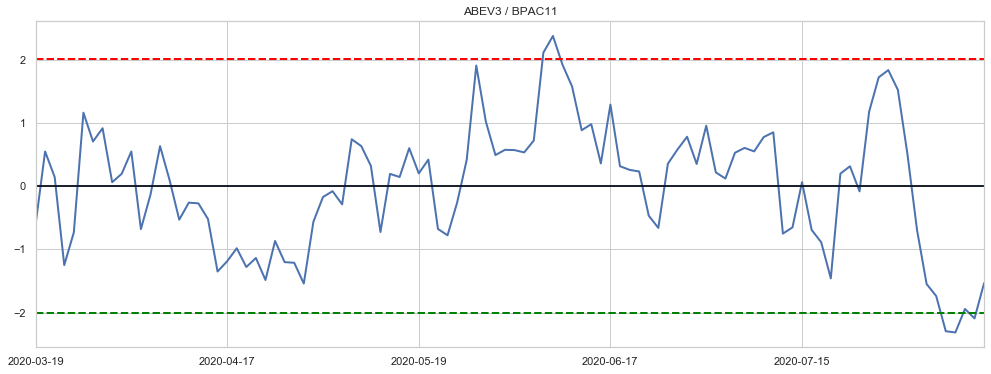

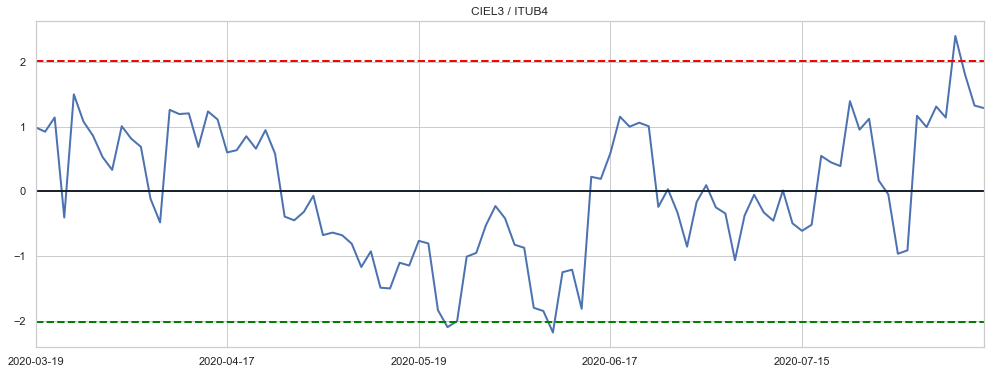

In [16]:
plot_pairs(oper, data)

In [17]:
#df.to_excel('datasets/data_cart.xlsx')

In [18]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    mult.summary(data, y_symbol, x_symbol, period)

Período de Análise                   100   Entrada                              Não
Independente                       ABEV3   Dependente                        BPAC11
R$                                 13.41   R$                                 87.31
Ratio                0.15359065653864734   
Somente para operação Beta Neutral:
Retorno  (%)           7.052339252011475   Gain                   72.16956989763784
Atual    (%)           5.381772611396807   Loss                  -58.39809703699408
Loss     (%)         -4.3548171291190485                                           
Dickey Fuller         -3.652910071575433   Meia Vida                              3
ADF                                   99   Correlação  (%)         39.8731310046949
p-value             0.004826441466801379   Inverter                           False
                                           Beta                  0.0764533193312833
Ratio Entrada          6.627832839522703   
Ratio Saída            6.16041558262